## Loading Libraries

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import requests
import datetime
import pytz
import mplfinance as mpf
from typing import Tuple
import warnings as wrn
from scipy.stats.mstats import winsorize

## Getting Data

In [351]:
df = pd.read_pickle('C:/github/Hmisc/FinanceLab-ass1/final_task_bad_data.pickle')

## Viewing data

In [352]:
df.shape

(502, 5)

In [353]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [354]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [355]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-02-17 00:00:00-05:00,154.187493,154.855315,152.114248,152.453140,8110300.0
2022-02-18 00:00:00-05:00,152.413269,153.180757,149.562559,150.868301,10785500.0
2022-02-22 00:00:00-05:00,149.702101,150.300143,147.130481,147.608917,12227200.0
2022-02-23 00:00:00-05:00,149.014346,149.253572,145.027340,145.396133,9300700.0
2022-02-24 00:00:00-05:00,139.545215,149.084134,139.545215,148.914673,12475500.0


In [356]:
df.describe()

,Open,High,Low,Close,Volume
count,502.000000,502.000000,502.000000,502.000000,5.010000e+02
mean,99.826219,101.003504,98.613673,138.813084,1.290093e+07
std,15.033235,15.250139,14.678095,624.452058,7.460270e+06
min,78.843041,79.530799,78.474245,-20.000000,5.426100e+06
25%,90.092497,90.995822,89.343816,90.181091,8.900900e+06
50%,96.002118,97.361360,94.801034,95.757915,1.125760e+07
75%,106.378302,107.644175,104.501919,106.261181,1.420600e+07
max,154.187493,154.855315,152.114248,9999.000000,7.027350e+07


### Handling Outliers

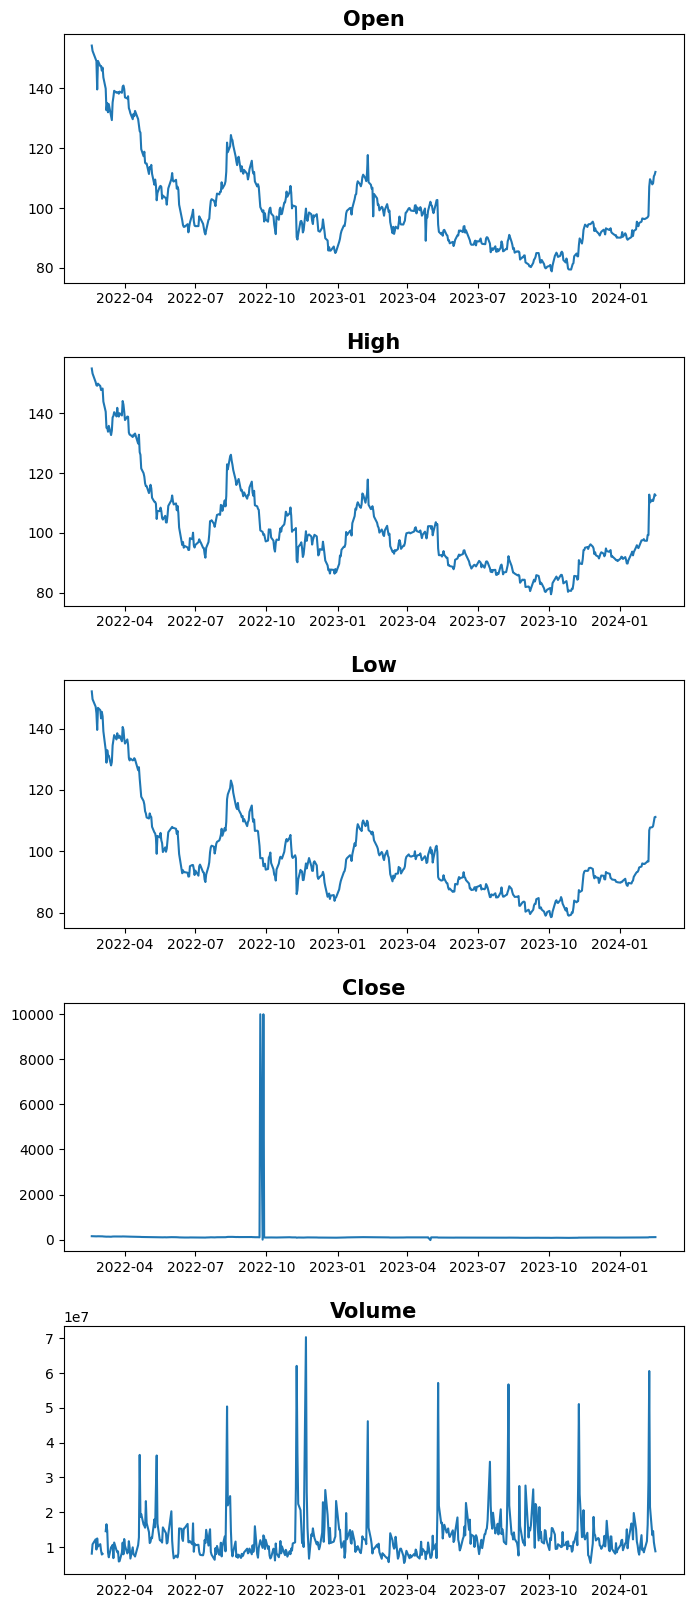

In [357]:
fig, ax = plt.subplots(nrows = 5, figsize = (8, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
ax[0].plot(df['Open'])
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
ax[1].plot(df['High'])
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
ax[2].plot(df['Low'])
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
ax[3].plot(df['Close'])
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)
ax[4].plot(df['Volume'])

[Text(0.5, 0, '')]

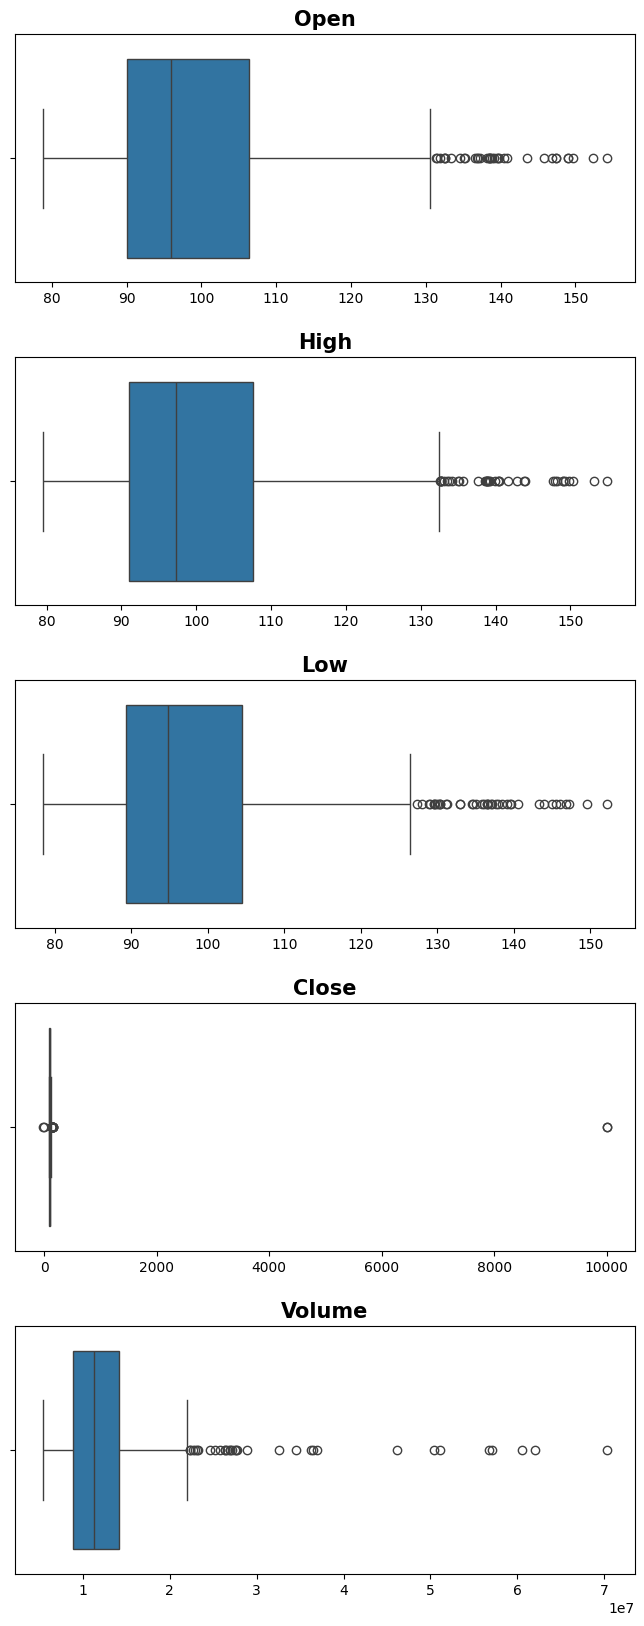

In [358]:
fig, ax = plt.subplots(nrows = 5, figsize = (8, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Open'], ax = ax[0]).set(xlabel = None)
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['High'], ax = ax[1]).set(xlabel = None)
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Low'], ax = ax[2]).set(xlabel = None)
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Close'], ax = ax[3]).set(xlabel = None)
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Volume'], ax = ax[4]).set(xlabel = None)

<Axes: title={'center': 'Volume'}, xlabel='Volume', ylabel='Count'>

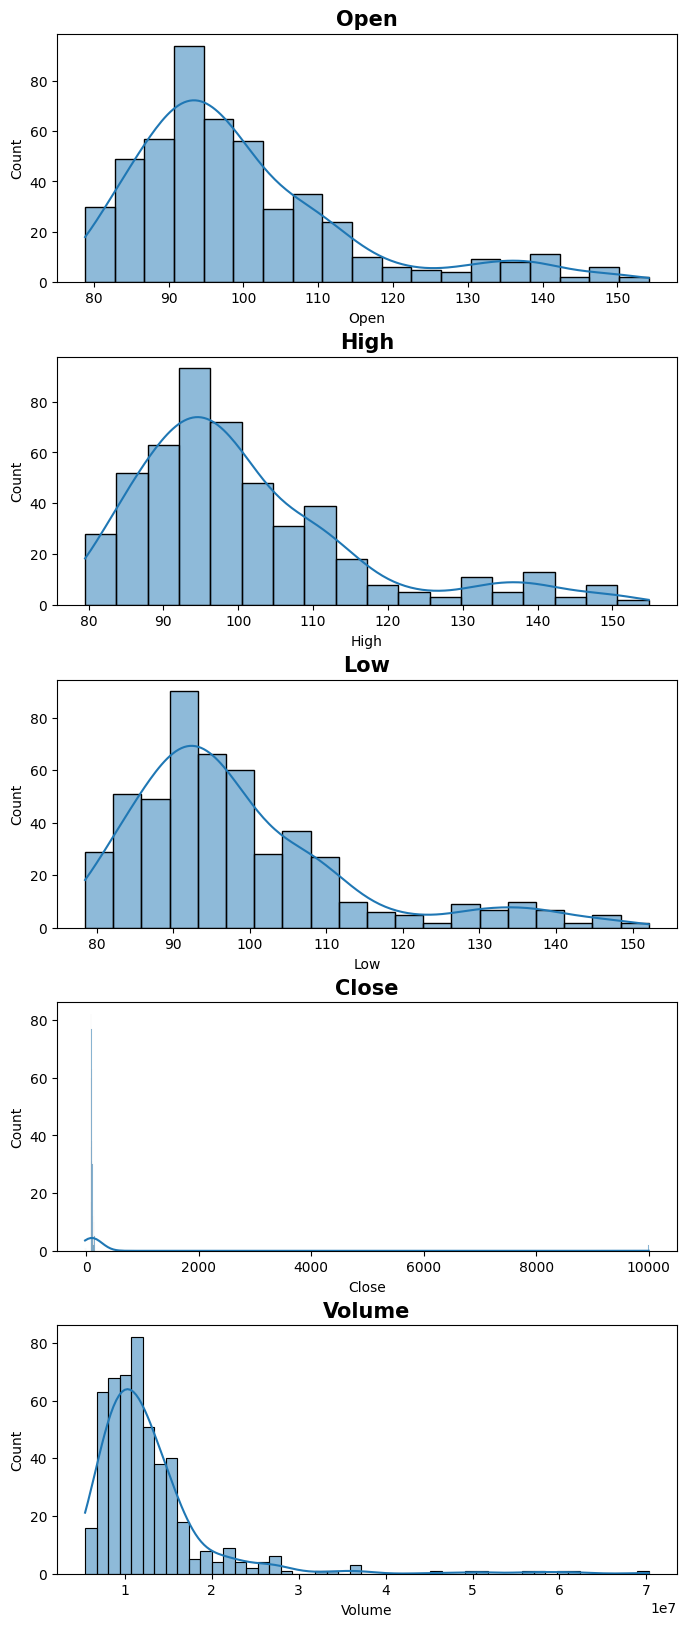

In [329]:
fig, ax = plt.subplots(nrows = 5, figsize = (8, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Open'], kde = True, ax = ax[0])
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['High'], kde = True, ax = ax[1])
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Low'], kde = True, ax = ax[2])
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Close'], kde = True, ax = ax[3])
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Volume'], kde = True, ax = ax[4])

In [330]:
# Tukey's rule
# customizable version to determin how forgiving or strict we want to be apon the data
def calc_outliers_customizable(srs: pd.Series, lowBoundPrcnt = 0.25, highBoundPrcnt = 0.75, BoundDistCoef = 1.5) -> Tuple[pd.Series, pd.array]:
    q1 = srs.quantile(lowBoundPrcnt)
    q3 = srs.quantile(highBoundPrcnt)
    iqr = q3 - q1
    lower_bound = q1 - BoundDistCoef * iqr
    upper_bound = q3 + BoundDistCoef * iqr
    is_outliers = (srs < lower_bound) | (srs > upper_bound)
    outliers = srs[is_outliers]
    return outliers, is_outliers

In [331]:
outliersOpen, is_outliersOpen = calc_outliers_customizable(df['Open'])
print(f'Amount of outliers in Open column: {outliersOpen.count()}')
outliersHigh, is_outliersHigh = calc_outliers_customizable(df['High'])
print(f'Amount of outliers in High column: {outliersHigh.count()}')
outliersLow, is_outliersLow = calc_outliers_customizable(df['Low'])
print(f'Amount of outliers in Low column: {outliersLow.count()}')
outliersClose, is_outliersClose = calc_outliers_customizable(df['Close'])
print(f'Amount of outliers in Close column: {outliersClose.count()}')
outliersVolume, is_outliersVolume = calc_outliers_customizable(df['Volume'])
print(f'Amount of outliers in Volume column: {outliersVolume.count()}')
print()

is_outliersOverall = sum([is_outliersOpen, is_outliersHigh, is_outliersLow, is_outliersClose, is_outliersVolume])
print(f'Amount of rows with at least 1 outlier: {is_outliersOverall.apply(lambda x: 1 if x>=1 else 0).sum()}')
print(f'Amount of rows with at least 2 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=2 else 0).sum()}')
print(f'Amount of rows with at least 3 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=3 else 0).sum()}')
print(f'Amount of rows with at least 4 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=4 else 0).sum()}')
print(f'Amount of rows with at least 5 outliers: {is_outliersOverall.apply(lambda x: 1 if x>=5 else 0).sum()}')

Amount of outliers in Open column: 36
Amount of outliers in High column: 39
Amount of outliers in Low column: 41
Amount of outliers in Close column: 42
Amount of outliers in Volume column: 32

Amount of rows with at least 1 outlier: 77
Amount of rows with at least 2 outliers: 40
Amount of rows with at least 3 outliers: 38
Amount of rows with at least 4 outliers: 35
Amount of rows with at least 5 outliers: 0


In [332]:
print(f'Outliers of Open column: {outliersOpen}')

Outliers of Open column: Date
2022-02-17 00:00:00-05:00    154.187493
2022-02-18 00:00:00-05:00    152.413269
2022-02-22 00:00:00-05:00    149.702101
2022-02-23 00:00:00-05:00    149.014346
2022-02-24 00:00:00-05:00    139.545215
2022-02-25 00:00:00-05:00    149.074152
2022-02-28 00:00:00-05:00    147.349779
2022-03-01 00:00:00-05:00    147.379671
2022-03-02 00:00:00-05:00    145.834706
2022-03-03 00:00:00-05:00    146.831460
2022-03-04 00:00:00-05:00    143.542169
2022-03-07 00:00:00-05:00    139.824304
2022-03-08 00:00:00-05:00    132.587885
2022-03-09 00:00:00-05:00    135.049870
2022-03-10 00:00:00-05:00    131.930031
2022-03-11 00:00:00-05:00    134.641190
2022-03-16 00:00:00-04:00    135.209337
2022-03-17 00:00:00-04:00    136.993533
2022-03-18 00:00:00-04:00    139.096675
2022-03-21 00:00:00-04:00    138.448782
2022-03-22 00:00:00-04:00    138.608254
2022-03-23 00:00:00-04:00    138.618234
2022-03-24 00:00:00-04:00    138.129820
2022-03-25 00:00:00-04:00    138.827548
2022-03-28

In [333]:
print(f'Outliers of High column: {outliersHigh}')

Outliers of High column: Date
2022-02-17 00:00:00-05:00    154.855315
2022-02-18 00:00:00-05:00    153.180757
2022-02-22 00:00:00-05:00    150.300143
2022-02-23 00:00:00-05:00    149.253572
2022-02-24 00:00:00-05:00    149.084134
2022-02-25 00:00:00-05:00    149.791814
2022-02-28 00:00:00-05:00    148.994413
2022-03-01 00:00:00-05:00    147.668723
2022-03-02 00:00:00-05:00    147.987693
2022-03-03 00:00:00-05:00    148.167103
2022-03-04 00:00:00-05:00    143.791357
2022-03-07 00:00:00-05:00    140.432323
2022-03-08 00:00:00-05:00    135.049862
2022-03-09 00:00:00-05:00    135.059832
2022-03-10 00:00:00-05:00    133.764050
2022-03-11 00:00:00-05:00    135.717684
2022-03-14 00:00:00-04:00    132.637724
2022-03-15 00:00:00-04:00    134.122885
2022-03-16 00:00:00-04:00    138.528521
2022-03-17 00:00:00-04:00    139.016937
2022-03-18 00:00:00-04:00    140.272834
2022-03-21 00:00:00-04:00    138.847492
2022-03-22 00:00:00-04:00    141.728091
2022-03-23 00:00:00-04:00    139.305979
2022-03-24

In [334]:
print(f'Outliers of Low column: {outliersLow}')

Outliers of Low column: Date
2022-02-17 00:00:00-05:00    152.114248
2022-02-18 00:00:00-05:00    149.562559
2022-02-22 00:00:00-05:00    147.130481
2022-02-23 00:00:00-05:00    145.027340
2022-02-24 00:00:00-05:00    139.545215
2022-02-25 00:00:00-05:00    146.741757
2022-02-28 00:00:00-05:00    145.984234
2022-03-01 00:00:00-05:00    143.312924
2022-03-02 00:00:00-05:00    145.445973
2022-03-03 00:00:00-05:00    143.980750
2022-03-04 00:00:00-05:00    139.096666
2022-03-07 00:00:00-05:00    133.006527
2022-03-08 00:00:00-05:00    128.869991
2022-03-09 00:00:00-05:00    132.926784
2022-03-10 00:00:00-05:00    131.192429
2022-03-11 00:00:00-05:00    131.142598
2022-03-14 00:00:00-04:00    127.962957
2022-03-15 00:00:00-04:00    129.089286
2022-03-16 00:00:00-04:00    134.501652
2022-03-17 00:00:00-04:00    136.116387
2022-03-18 00:00:00-04:00    137.850735
2022-03-21 00:00:00-04:00    136.435355
2022-03-22 00:00:00-04:00    138.448770
2022-03-23 00:00:00-04:00    137.093190
2022-03-24 

In [335]:
print(f'Outliers of Close column: {outliersClose}')

Outliers of Close column: Date
2022-02-17 00:00:00-05:00     152.453140
2022-02-18 00:00:00-05:00     150.868301
2022-02-22 00:00:00-05:00     147.608917
2022-02-23 00:00:00-05:00     145.396133
2022-02-24 00:00:00-05:00     148.914673
2022-02-25 00:00:00-05:00     149.044250
2022-02-28 00:00:00-05:00     147.977737
2022-03-01 00:00:00-05:00     145.226685
2022-03-02 00:00:00-05:00     146.861359
2022-03-03 00:00:00-05:00     145.097122
2022-03-04 00:00:00-05:00     140.262863
2022-03-07 00:00:00-05:00     133.066330
2022-03-08 00:00:00-05:00     131.322006
2022-03-09 00:00:00-05:00     133.215836
2022-03-10 00:00:00-05:00     133.205872
2022-03-11 00:00:00-05:00     131.322006
2022-03-15 00:00:00-04:00     133.764053
2022-03-16 00:00:00-04:00     137.691254
2022-03-17 00:00:00-04:00     139.016937
2022-03-18 00:00:00-04:00     139.844238
2022-03-21 00:00:00-04:00     138.169693
2022-03-22 00:00:00-04:00     139.654846
2022-03-23 00:00:00-04:00     137.192871
2022-03-24 00:00:00-04:00 

In [336]:
print(f'Outliers of Volume column: {outliersVolume}')

Outliers of Volume column: Date
2022-04-20 00:00:00-04:00    36465700.0
2022-04-28 00:00:00-04:00    23192100.0
2022-05-11 00:00:00-04:00    26933300.0
2022-05-12 00:00:00-04:00    36298800.0
2022-08-10 00:00:00-04:00    26398700.0
2022-08-11 00:00:00-04:00    50375000.0
2022-08-15 00:00:00-04:00    24628300.0
2022-11-08 00:00:00-05:00    27130300.0
2022-11-09 00:00:00-05:00    62029800.0
2022-11-10 00:00:00-05:00    36968100.0
2022-11-11 00:00:00-05:00    22373300.0
2022-11-21 00:00:00-05:00    70273500.0
2022-11-22 00:00:00-05:00    25753700.0
2022-12-13 00:00:00-05:00    22882100.0
2022-12-16 00:00:00-05:00    26383900.0
2022-12-30 00:00:00-05:00    23231000.0
2023-02-08 00:00:00-05:00    27719900.0
2023-02-09 00:00:00-05:00    46137200.0
2023-05-11 00:00:00-04:00    57127200.0
2023-06-16 00:00:00-04:00    22665000.0
2023-07-17 00:00:00-04:00    34503400.0
2023-08-09 00:00:00-04:00    32517900.0
2023-08-10 00:00:00-04:00    56716800.0
2023-08-24 00:00:00-04:00    27531000.0
2023-09-

In [337]:
wrn.filterwarnings('ignore')
is_outliersAtLeast = is_outliersOverall>0
dates = is_outliersAtLeast[is_outliersAtLeast].index
diffs = dates.to_series().diff().dt.days
diffs = diffs[diffs.isna() == False]

outliersDiffs, is_outliersDiffs = calc_outliers_customizable(diffs)

print(f'Average time difference between outliers: {diffs.mean()} days')
print(f'Average time difference between outliers (excluding theire outliers): {diffs[~is_outliersDiffs].mean()} days')

Average time difference between outliers: 9.460526315789474 days
Average time difference between outliers (excluding theire outliers): 2.129032258064516 days


most of the outlier samples are fairly close to each other, therefor setting their values to none are not so much of an option.

because this will make the handling of none values be much more difficult and the result of the handling to be very squed and non-representive of the.

so instead we chose to winsorize them to keep as much data as possible but reduce the effect of these outliers on the rest data.

but due to the way that the winsorize function works the none values should be handled before the winsorize function, and before that we should try and recoginse if there are any rows that contain illogical set of numbers.

# Identifying illogicals

### Checking for rows with ilogical values
meaning rows with Low value higher the High value, or Close / Open with lower value than the Low value or with higher value than the High value

In [338]:
is_illogical = (df['High'] < df['Low']) | (df['High'] < df['Open']) | (df['High'] < df['Close']) | (df['Low'] > df['Open']) | (df['Low'] > df['Close'])
is_illogical = is_illogical.to_frame("is_illogical")

print(f'there are {is_illogical.sum()} rows with illogical values')

there are is_illogical    6
dtype: int64 rows with illogical values


In [339]:
df[is_illogical.is_illogical]

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-23 00:00:00-04:00,100.293137,100.851316,97.701578,9999.000000,11976900.0
2022-09-26 00:00:00-04:00,98.628560,100.333012,97.741452,0.000000,9760500.0
2022-09-27 00:00:00-04:00,99.206673,99.316317,95.119994,9999.000000,13360200.0
2023-02-16 00:00:00-05:00,97.200627,107.669094,105.356631,105.486214,9479900.0
2023-04-25 00:00:00-04:00,89.057157,99.386087,97.691612,97.691612,6511400.0
2023-05-01 00:00:00-04:00,102.077323,102.276670,101.279918,-20.000000,6909500.0


due to the small amount of mistakes such as these that we were able to detect we'll handle them manually and give each one the care it needs.

we see here 2 kinds of mistakes.

the first is when the Close is the illogical value, this occurs at the dates:
* 2022-09-23
* 2022-09-26
* 2022-09-27
* 2023-05-01

these instances we can seperate even further to 2 cases, consecutive rows, and non-consecutive rows.

2022-09-23, 2022-09-26 and 2022-09-27 are consecutive, due to 2022-09-23 being the last day in the week where there was any trade.

the first and the last instance within these three we'll drop from the data, not significant enough to keep, and the date 2022-09-26 its close value will be set to none and will be handled later no.

2023-05-01 is the non-consecutive row, and just as much the two that were removed in the consecutive case it has insignificant affect on the hole change of the data, this row will be dropped as well.

the second is when the low value is higher than the Open, this occurs at the dates:
* 2023-02-16
* 2023-04-25

both these instances are when the Low is higher than the Open, to address this we'll set the Low value to be the same as the Open value in these rows

In [340]:
# marking rows according to the illogical values they have
is_illogical["Close_fix_needed"] = df.Close == df.Close.apply(np.floor)
is_illogical["Low_fix_needed"] = ((df.Low > df.Close) | (df.Low > df.Open)) & (is_illogical.Close_fix_needed == False)
is_illogical[is_illogical.is_illogical]

,is_illogical,Close_fix_needed,Low_fix_needed
Date,,,
2022-09-23 00:00:00-04:00,True,True,False
2022-09-26 00:00:00-04:00,True,True,False
2022-09-27 00:00:00-04:00,True,True,False
2023-02-16 00:00:00-05:00,True,False,True
2023-04-25 00:00:00-04:00,True,False,True
2023-05-01 00:00:00-04:00,True,True,False


In [341]:
# mark rows to drop and set appropriate values for Close and row
is_illogical["to_drop"] = False
count = 0
for i in is_illogical.index:
    if is_illogical.Close_fix_needed[i]:
        if count%2 == 0:
            is_illogical.to_drop[i] = True
        else:
            df.Close[i] = None
        count += 1
    else:
        count = 0
    if is_illogical.Low_fix_needed[i]:
        df.Low[i] = min(df.Close[i], df.Open[i])

# drop rows that were marked
df = df[~is_illogical.to_drop]
is_illogical = is_illogical[~is_illogical.to_drop]
is_illogical = is_illogical.drop(columns = "to_drop")

### Handling None Values

First we'll check how many none values are there in the dataframe, and check if there is there a row with more than one none value

In [342]:
df.isna().sum()

Open      0
High      0
Low       0
Close     1
Volume    1
dtype: int64

In [343]:
df[df.Close.isna()].isna().sum()

Open      0
High      0
Low       0
Close     1
Volume    0
dtype: int64

In [344]:
df[df.Volume.isna()].isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    1
dtype: int64

Luckily there isnt any row with more than 1

for each row with na in it we fill the na with the value of the median of the value that is missing of all the preceding rows that have a similar enough to it in all the values that arent na in that row.

this way we insure that the missing value is the most logically similar to the correct value that is supposed to be there.

In [345]:
aroundOpen = (df['Open'] == 0) & False
aroundHigh = (df['High'] == 0) & False
aroundLow = (df['Low'] == 0) & False
aroundClose = (df['Close'] == 0) & False
aroundVolume = (df['Volume'] == 0) & False
for i in df.index[df.isna().any(axis = 1)]:
    columnSds = df.loc[df.index[0]:i,:].std()
    naCol = df.columns[df.loc[i].isna()]
    if naCol[0] != 'Open': aroundOpen = (df['Open'] <= df.loc[i,'Open'] + columnSds['Open']) & (df['Open'] >= df.loc[i,'Open'] - columnSds['Open']) & (df.index <= i)
    if naCol[0] != 'High': aroundHigh = (df['High'] <= df.loc[i,'High'] + columnSds['High']) & (df['High'] >= df.loc[i,'High'] - columnSds['High']) & (df.index <= i)
    if naCol[0] != 'Low': aroundLow = (df['Low'] <= df.loc[i,'Low'] + columnSds['Low']) & (df['Low'] >= df.loc[i,'Low'] - columnSds['Low']) & (df.index <= i)
    if naCol[0] != 'Close': aroundClose = (df['Close'] <= df.loc[i,'Close'] + columnSds['Close']) & (df['Close'] >= df.loc[i,'Close'] - columnSds['Close']) & (df.index <= i)
    if naCol[0] != 'Volume': aroundVolume = (df['Volume'] <= df.loc[i,'Volume'] + columnSds['Volume']) & (df['Volume'] >= df.loc[i,'Volume'] - columnSds['Volume']) & (df.index <= i)
    rows_to_use = (aroundOpen if naCol[0] != 'Open' else True) & (aroundHigh if naCol[0] != 'High' else True) & (aroundLow if naCol[0] != 'Low' else True) & (aroundClose if naCol[0] != 'Close' else True) & (aroundVolume if naCol[0] != 'Volume' else True) & (df.loc[i, naCol[0]] != None)
    if rows_to_use.sum() > 1:
        df.loc[i,naCol[0]] = df[rows_to_use][naCol[0]].median()
    else:
        df.loc[i,naCol[0]] = df[df.index<= i][naCol[0]].median()

In [346]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [347]:
alpha = 0.05
beta = 0.05
df['Open'] = winsorize(df['Open'], limits = [alpha, beta])
df['High'] = winsorize(df['High'], limits = [alpha, beta])
df['Low'] = winsorize(df['Low'], limits = [alpha, beta])
df['Close'] = winsorize(df['Close'], limits = [alpha, beta])
df['Volume'] = winsorize(df['Volume'], limits = [alpha, beta])

[Text(0.5, 0, '')]

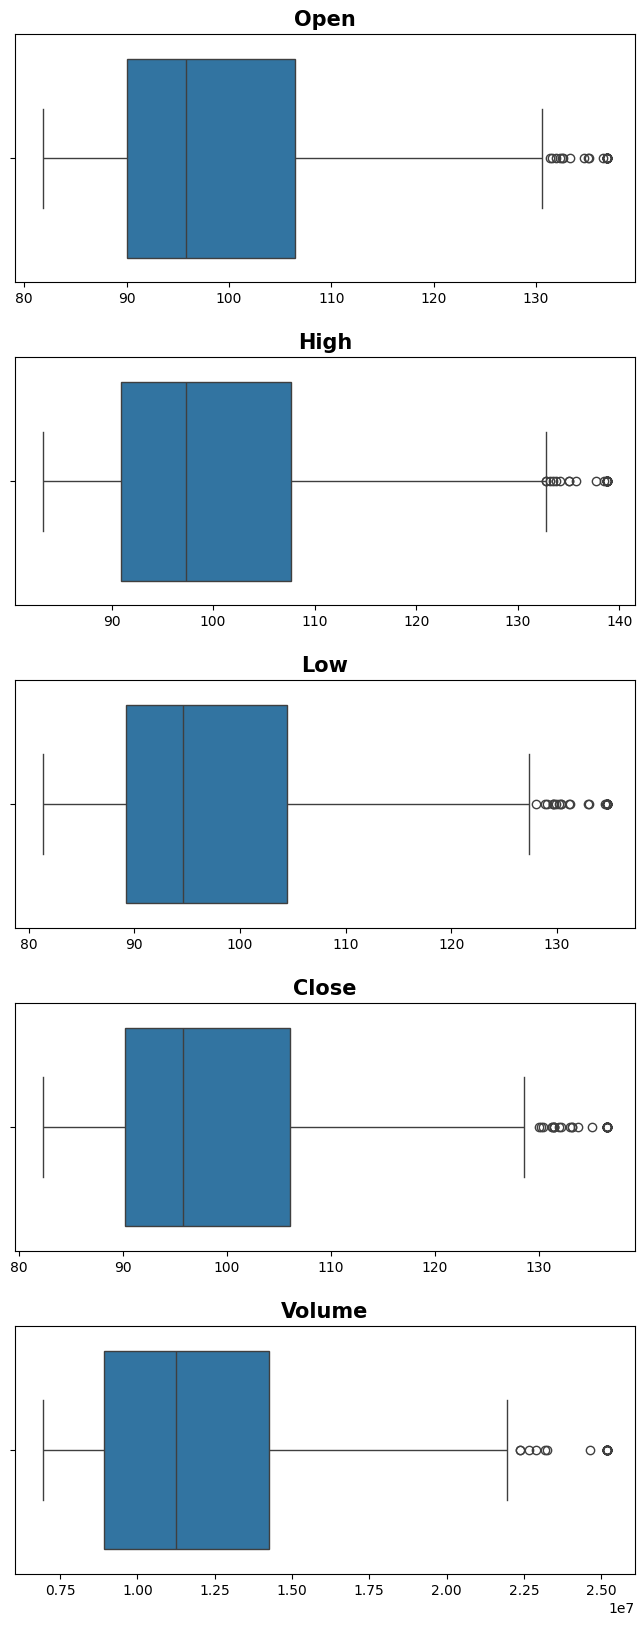

In [348]:
fig, ax = plt.subplots(nrows = 5, figsize = (8, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Open'], ax = ax[0]).set(xlabel = None)
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['High'], ax = ax[1]).set(xlabel = None)
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Low'], ax = ax[2]).set(xlabel = None)
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Close'], ax = ax[3]).set(xlabel = None)
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)
sns.boxplot(x = df['Volume'], ax = ax[4]).set(xlabel = None)

<Axes: title={'center': 'Volume'}, xlabel='Volume', ylabel='Count'>

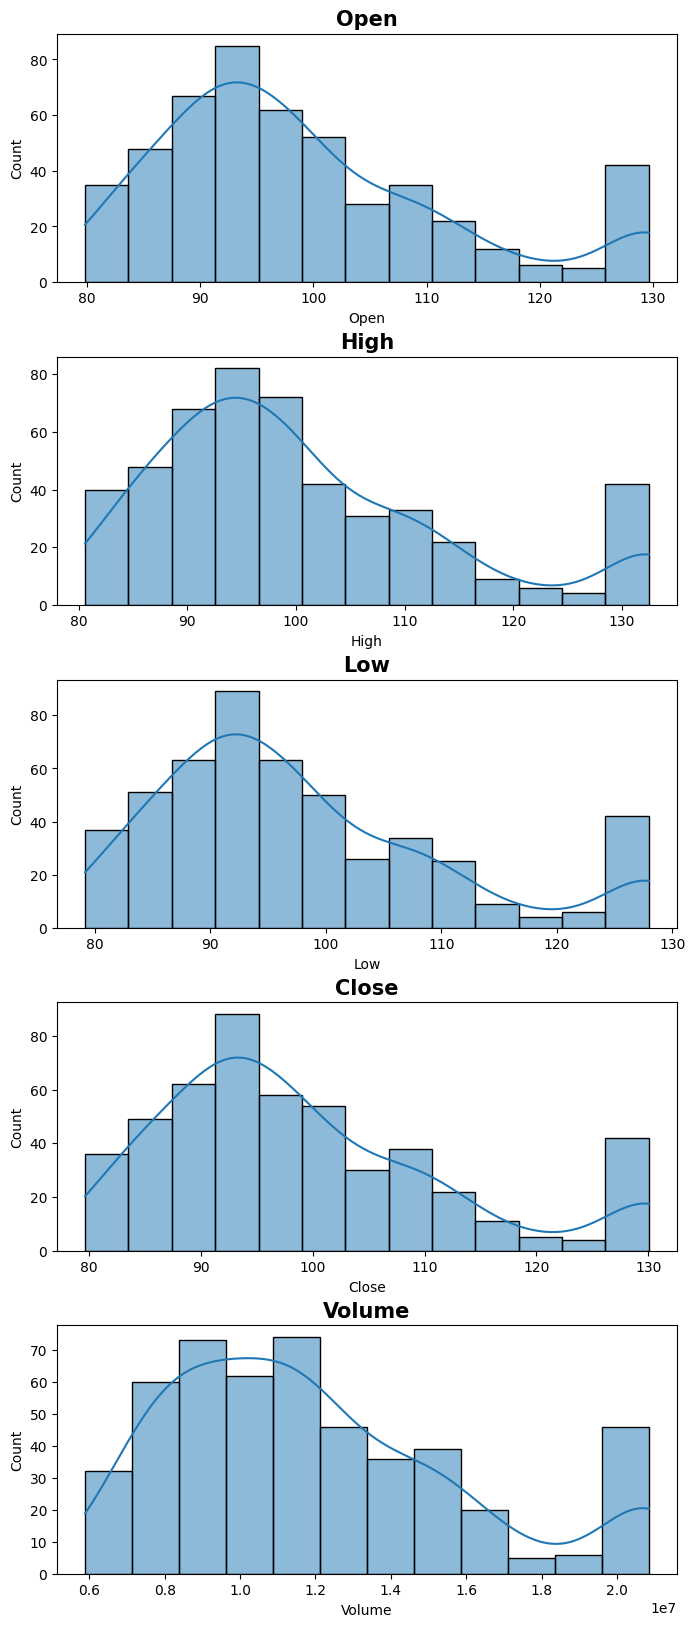

In [318]:
fig, ax = plt.subplots(nrows = 5, figsize = (8, 20))
plt.subplots_adjust(hspace = 0.3)
ax[0].set_title('Open', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Open'], kde = True, ax = ax[0])
ax[1].set_title('High', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['High'], kde = True, ax = ax[1])
ax[2].set_title('Low', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Low'], kde = True, ax = ax[2])
ax[3].set_title('Close', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Close'], kde = True, ax = ax[3])
ax[4].set_title('Volume', fontweight = 'bold').set_fontsize(15)
sns.histplot(df['Volume'], kde = True, ax = ax[4])

In [319]:
df.to_pickle('C:/github/Hmisc/FinanceLab-ass1/fixed_data.pickle')

our solution is not imune to data leakage because we are only reducing the effect that the outliers have and not eliminitating it.

we belive that the data leakage could be better handled if the data was more specific within the days rather than a summary of the day.

through this we can detect in a more specific scale most, if not all, of the outlier purchases that represent data leakage, and acomodate to them, and by doing so reduce the effect of data leakage even more.

but even though this will decrease the effect that data leakage has on the data, it will not be eliminated unless we had the same information that leaked and when it was leaked.

that is because there still is there the possibility of the effects the data leakage to take place in a much smaller scale, and therefor these effects will hide between the actual data and go un-noticed without access to that same information that has leaked.

# part 2

### indicators used in indian scammer video, explained

##### UT Bot Indicator key features and introduction

UT Bot is a versatile and customisable technical indicator designed to cater to various trading styles, including scalping, intraday, and swing trading. The UT Bot indicator analyses current market conditions in real time using algorithmic calculations and provides insightful, actionable trading signals. Offering an adaptable framework, the UT Bot enables traders to fine-tune their strategies in alignment with their preferred risk tolerance, time horizon, and investment objectives.

– Real-time signals: UT Bot’s logic provides real-time entry and exit signals, helping traders identify potential trade opportunities in the market.

– Adaptive framework: UT Bot allows traders to customise the indicator parameters to suit their trading styles and objectives.

– Compatible with multiple assets: Traders can utilise UT Bot for various financial instruments, including stocks, forex, futures, and cryptocurrencies.

– Wide applicability: The UT Bot’s flexibility enables its effective application in diverse trading strategies, ranging from scalping to long-term trading.

To enhance the UT Bot indicator’s efficiency, it is recommended to incorporate additional technical analysis tools and chart patterns into the decision-making process.

Uses Moving Avrage (MA): to identify overall trend in the market

Uses Average True Range (ATR): is used as a trailing stop loss (ATR_TSL)

Buy Signal: close price is higher than the ATR and the EMA is over the ATR

Sell Signal: close price is lower than the ATR and the EMA is under the ATR

##### STC Indicator (Schaff Trend Cycle) key features and introduction

The Schaff Trend Cycle (STC) is a unique technical indicator developed by Doug Schaff. STC combines elements of both trend-following and oscillator indicators, resulting in a versatile tool that aims to identify market trends and potential reversals with greater precision and timeliness than traditional indicators.

Calculating the Schaff Trend Cycle
The Schaff Trend Cycle calculation involves a four-step process:

1. Calculate the 23-period Exponential Moving Average (EMA) of the instrument’s closing prices.

2. Calculate the 50-period EMA of the instrument’s closing prices.

3. Compute the absolute difference between the 23-period and 50-period EMAs.

4. Apply the Stochastic oscillator formula to the difference values, combining it with a cycle component (default: 10-period) to obtain the STC curve.

Interpreting the Schaff Trend Cycle
The STC oscillates in a range between 0 and 100, with values above 25 and below 75 considered “inner bounds”. The interpretation of the Schaff Trend Cycle values is as follows:

– When the STC line crosses above the 25 level, it may signal a potential bullish trend, indicating a potential long entry or short exit opportunity.

– When the STC line crosses below the 75 level, it could suggest a potential bearish trend, signifying a potential short entry or long exit opportunity.

While the Schaff Trend Cycle offers insightful trend signals, it is essential to corroborate these with additional technical indicators and chart patterns before executing trades.

STC calculation as follows:

1. calculate the 23-period and the 50-period exponential Moving Average (EMA) of the closing price:
* EMA_23 = EMA(Close, Short Length = 23)
* EMA_50 = EMA(Close, Short Length = 50)
2. Determine tha MACD Value:
* MACD = EMA_23 - EMA_50
3. Calcuate the 10-period Stochastic value from the MACD values:
* STC = 100 * (MACD - %K(MACD))/(%D(MACD) - %K(MACD))

%K(MACD) - lowest in range
%D(MACD) - highest in range

In [22]:


def make_api_call(base_url, endpoint="", method="GET", **kwargs):
    # Construct the full URL
    full_url = f'{base_url}{endpoint}'

    # Make the API call
    response = requests.request(method=method, url=full_url, **kwargs)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        return response
    else:
        # If the request was not successful, raise an exception with the error message
        raise Exception(f'API request failed with status code {response.status_code}: {response.text}')

In [23]:
base_url = 'https://fapi.binance.com'
method = 'GET'
endpoint = '/fapi/v1/time'
response = make_api_call(base_url, endpoint, method).json()
response

{'serverTime': 1709369253480}

In [24]:


# generalize this part!!!!

# extract server timestamp
server_time = response['serverTime']

# convert timestamp to regular date
date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)
date_string = date.strftime("%Y-%m-%d %H:%M:%S %Z")
print(f'server_time as timestamp: {int(server_time) / 1000.0}, date: {date_string}')

# convert timestamp to Asia/Jerusalem
utc_date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)
jer_tz= pytz.timezone('Asia/Jerusalem')
date_in_jer= utc_date.replace(tzinfo=pytz.utc).astimezone(jer_tz)
date_string_jer = date_in_jer.strftime("%Y-%m-%d %H:%M:%S %Z")
print(f'server_time as timestamp: {int(server_time) / 1000.0}, date in Asia/Jerusalem: {date_string_jer}')

# move one week earlier
week_before = date - datetime.timedelta(weeks=1)
week_before_date_string = week_before.strftime("%Y-%m-%d %H:%M:%S UTC")
print(f'One week before as timestamp {week_before.timestamp()}, date: {week_before_date_string}')

server_time as timestamp: 1709369253.48, date: 2024-03-02 08:47:33 
server_time as timestamp: 1709369253.48, date in Asia/Jerusalem: 2024-03-02 10:47:33 IST
One week before as timestamp 1708757253.48, date: 2024-02-24 08:47:33 UTC


C:\Users\tomge\AppData\Local\Temp\ipykernel_33184\2902868958.py:10: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)
C:\Users\tomge\AppData\Local\Temp\ipykernel_33184\2902868958.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  utc_date = datetime.datetime.utcfromtimestamp(int(server_time) / 1000.0)


In [62]:
def get_binance_historical_data(symbol, interval, start_date, end_date):
    
    # define basic parameters for call
    base_url = 'https://fapi.binance.com'
    endpoint = '/fapi/v1/klines'
    method = 'GET'
    
    # Set the start time parameter in the params dictionary
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': 1500,
        'startTime': start_date, # Start time in milliseconds
        'endTime': end_date # end time in milliseconds
    }


    # Make initial API call to get candles
    response = make_api_call(base_url, endpoint=endpoint, method=method, params=params)
    
    # initalize candles data
    candles_data = []

    # Append the received candles to the list
    candles_data.extend(response.json())

    # Update the start time for the next API call
    params['startTime'] = candles_data[-1][0] + 1 # last candle open_time + 1ms    

    while len(response.json()) > 0:
        # Make the next API call
        response = make_api_call(base_url, endpoint=endpoint, method=method, params=params)

        # Append the received candles to the list
        candles_data.extend(response.json())

        # Update the start time for the next API call
        params['startTime'] = candles_data[-1][0] + 1 # last candle open_time + 1ms
        
        if params['startTime'] > params['endTime']:
            break

            

    
    # Wrap the candles data as a pandas DataFrame
    columns = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume',
               'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
    dtype={
    'open_time': 'datetime64[ms, Asia/Jerusalem]',
    'open': 'float64',
    'high': 'float64',
    'low': 'float64',
    'close': 'float64',
    'volume': 'float64',
    'close_time': 'datetime64[ms, Asia/Jerusalem]',
    'quote_asset_volume': 'float64',
    'number_of_trades': 'int64',
    'taker_buy_base_asset_volume': 'float64',
    'taker_buy_quote_asset_volume': 'float64',
    'ignore': 'float64'
    }
    
    df = pd.DataFrame(candles_data, columns=columns)
    df = df.astype(dtype)

    return df

In [61]:
# specific endpoint and method
symbol = 'BTCUSDT'
endpoint = '/fapi/v1/klines'
start_date = int(datetime.datetime(year=2023, month=1, day=1).timestamp() * 1000)
end_date = int(datetime.datetime(year=2024, month=1, day=1).timestamp() * 1000)

# make call
btcusdt_df = get_binance_historical_data(symbol, '30m', start_date, end_date)
btcusdt_df

1675222200001
1677922200001
1680622200001
1683322200001
1686022200001
1688722200001
1691422200001
1694122200001
1696822200001
1699522200001
1702222200001


,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-01-01 00:00:00+02:00,16544.0,16565.1,16496.0,16540.7,7737.533,2023-01-01 00:29:59.999000+02:00,1.279086e+08,35451,3338.726,5.520766e+07,0.0
1,2023-01-01 00:30:00+02:00,16540.8,16550.8,16461.8,16515.1,8929.034,2023-01-01 00:59:59.999000+02:00,1.473757e+08,41907,3740.250,6.174233e+07,0.0
2,2023-01-01 01:00:00+02:00,16515.1,16524.6,16483.1,16520.9,5215.713,2023-01-01 01:29:59.999000+02:00,8.608995e+07,27411,2761.688,4.558437e+07,0.0
3,2023-01-01 01:30:00+02:00,16520.9,16546.9,16516.5,16537.6,3127.373,2023-01-01 01:59:59.999000+02:00,5.171514e+07,17078,1772.384,2.930818e+07,0.0
4,2023-01-01 02:00:00+02:00,16537.5,16540.9,16513.4,16539.4,2832.734,2023-01-01 02:29:59.999000+02:00,4.681919e+07,16561,1373.220,2.269722e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17516,2023-12-31 22:00:00+02:00,42659.9,42724.5,42600.0,42627.2,2559.181,2023-12-31 22:29:59.999000+02:00,1.091479e+08,28539,1367.677,5.833755e+07,0.0
17517,2023-12-31 22:30:00+02:00,42627.2,42662.5,42543.3,42599.1,2171.755,2023-12-31 22:59:59.999000+02:00,9.251599e+07,27578,1098.223,4.678832e+07,0.0
17518,2023-12-31 23:00:00+02:00,42599.2,42717.0,42586.7,42674.8,1468.758,2023-12-31 23:29:59.999000+02:00,6.265517e+07,20273,862.639,3.679818e+07,0.0
17519,2023-12-31 23:30:00+02:00,42674.8,42689.1,42558.2,42558.9,2325.252,2023-12-31 23:59:59.999000+02:00,9.909701e+07,24200,1099.718,4.687127e+07,0.0
